In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1) employee attrition prediction - age, salary, over time, job satisfaction, work life balance, attrition , build a decision tree

In [30]:
df_attrition = df = pd.DataFrame({
    "Age": [25,29,32,41,27,36,30,45,28,39,31,47,26,42,33,
            38,29,44,27,40,34,37,28,43,30,46,26,39,31,48],

    "Salary": [28000,32000,40000,60000,30000,45000,35000,70000,31000,52000,
               38000,75000,29000,62000,41000,50000,33000,68000,30500,58000,
               42000,48000,31500,64000,36000,72000,29500,51500,37500,76000],

    "OverTime": ["Yes","Yes","No","No","Yes","No","Yes","No","Yes","No",
                 "Yes","No","Yes","No","Yes","No","Yes","No","Yes","No",
                 "Yes","No","Yes","No","Yes","No","Yes","No","Yes","No"],

    "JobSatisfaction": ["Yes","No","Yes","Yes","Yes","Yes","No","Yes","Yes","Yes",
                        "No","Yes","Yes","Yes","No","Yes","Yes","Yes","No","Yes",
                        "Yes","Yes","No","Yes","Yes","Yes","No","Yes","Yes","Yes"],

    "WorkLifeBalance": ["No","No","Yes","Yes","No","Yes","Yes","Yes","No","Yes",
                        "Yes","Yes","No","Yes","Yes","Yes","No","Yes","No","Yes",
                        "Yes","Yes","No","Yes","Yes","Yes","No","Yes","Yes","Yes"],

    "Attrition": ["Yes","Yes","No","No","Yes","No","Yes","No","Yes","No",
                  "Yes","No","Yes","No","Yes","No","Yes","No","Yes","No",
                  "Yes","No","Yes","No","Yes","No","Yes","No","Yes","No"]
})
df_attrition

,Age,Salary,OverTime,JobSatisfaction,WorkLifeBalance,Attrition
0,25,28000,Yes,Yes,No,Yes
1,29,32000,Yes,No,No,Yes
2,32,40000,No,Yes,Yes,No
3,41,60000,No,Yes,Yes,No
4,27,30000,Yes,Yes,No,Yes
5,36,45000,No,Yes,Yes,No
6,30,35000,Yes,No,Yes,Yes
7,45,70000,No,Yes,Yes,No
8,28,31000,Yes,Yes,No,Yes
9,39,52000,No,Yes,Yes,No


In [31]:
from sklearn.preprocessing import LabelEncoder

OverTime = LabelEncoder()
JobSatisfaction = LabelEncoder()
WorkLifeBalance = LabelEncoder()
Attrition = LabelEncoder()

df_attrition["OverTime"] = OverTime.fit_transform(df_attrition["OverTime"])
df_attrition["JobSatisfaction"] = JobSatisfaction.fit_transform(df_attrition["JobSatisfaction"])
df_attrition["WorkLifeBalance"] = WorkLifeBalance.fit_transform(df_attrition["WorkLifeBalance"])
df_attrition["Attrition"] = Attrition.fit_transform(df_attrition["Attrition"])

df_attrition

,Age,Salary,OverTime,JobSatisfaction,WorkLifeBalance,Attrition
0,25,28000,1,1,0,1
1,29,32000,1,0,0,1
2,32,40000,0,1,1,0
3,41,60000,0,1,1,0
4,27,30000,1,1,0,1
5,36,45000,0,1,1,0
6,30,35000,1,0,1,1
7,45,70000,0,1,1,0
8,28,31000,1,1,0,1
9,39,52000,0,1,1,0


In [14]:
feature_cols = ["Age","Salary","OverTime","JobSatisfaction","WorkLifeBalance"]
X = df_attrition[feature_cols]
Y = df_attrition["Attrition"]

In [28]:
# train data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state = 42)

In [21]:
# create model

from sklearn.tree import DecisionTreeClassifier

model_Attrition = DecisionTreeClassifier(criterion = "gini")
model_Attrition.fit(X_train, Y_train)

DecisionTreeClassifier()

In [22]:
model_Attrition.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1])

In [23]:
Y_test

27    0
15    0
23    0
17    0
8     1
9     0
28    1
24    1
Name: Attrition, dtype: int32

In [24]:
model_Attrition.score(X_test, Y_test)

1.0

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.625, 0.5, '  False')]

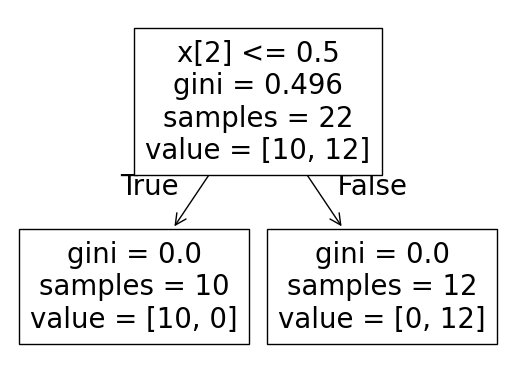

In [25]:
# plot the decision tree

from sklearn import tree

tree.plot_tree(model_Attrition)

# Random Forest Algorithm

In [32]:
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [33]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [36]:
import pandas as pd

data = pd.DataFrame({"Sepal length": iris.data[:,0],
                    "Sepal Width": iris.data[:,1],
                     "Petal length": iris.data[:,2],
                     "Petal width": iris.data[:,3],
                     "Species": iris.target
                    })
data

,Sepal length,Sepal Width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [39]:
X = data[["Sepal length","Sepal Width","Petal length","Petal width"]] # features
Y = data["Species"] # labels

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 24)

In [41]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

105
45
105
45


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
clf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=0)
clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [45]:
clf.predict(X_test)

array([2, 2, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0,
       1])

In [46]:
Y_test

107    2
114    2
57     1
59     1
105    2
11     0
48     0
72     1
29     0
148    2
30     0
19     0
26     0
111    2
144    2
14     0
103    2
31     0
104    2
120    2
112    2
140    2
135    2
51     1
136    2
1      0
108    2
137    2
49     0
109    2
78     1
17     0
77     1
92     1
133    2
113    2
9      0
84     1
53     1
58     1
95     1
22     0
15     0
20     0
69     1
Name: Species, dtype: int32

In [47]:
clf.score(X_test, Y_test)

0.9555555555555556

In [48]:
clf.predict([[3,5,4,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [49]:
clf.predict([[3,3,3,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [60]:
# Another method

df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
species = LabelEncoder()
df["species"] = species.fit_transform(df["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [55]:
X = data[["Sepal length","Sepal Width","Petal length","Petal width"]] # features
Y = data["Species"] # labels
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 24)

clf2 = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
clf2.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [57]:
clf.score(X_test, Y_test)

0.9555555555555556

In [58]:
clf.predict([[3,5,4,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [61]:
clf.predict([[3,3,3,2]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [4]:
# random forest for diabetics prediction - predict whether a patient is disabetic using health parameters - BP, glucose, BMI, age, sex

from sklearn import datasets
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [16]:
data_diabetes = pd.DataFrame({"Age": diabetes.data[:,0],
                             "Sex": diabetes.data[:,1],
                             "BMI": diabetes.data[:,2],
                             "BP": diabetes.data[:,3],
                              "Glucose": diabetes.data[:,9],
                              "Sugar_level": diabetes.target
                             })
data_diabetes

# Each feature has been standardized to have mean = 0 and variance = 1 - Eg. age is standard deviations above the mean age of the dataset

,Age,Sex,BMI,BP,Glucose,Sugar_level
0,0.038076,0.050680,0.061696,0.021872,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,-0.046641,135.0
...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,-0.025930,220.0


In [42]:
X = data_diabetes[['Age', 'Sex', 'BMI', 'BP', 'Glucose']]
Y = data_diabetes['Sugar_level']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 21)

In [58]:
from sklearn.ensemble import RandomForestRegressor

rfc_diabetes = RandomForestRegressor(n_estimators=100, random_state=0)
rfc_diabetes.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [59]:
rfc_diabetes.predict(X_test)

array([209.85, 165.1 , 205.54, 180.3 , 118.16, 201.79,  84.79, 112.99,
       100.32, 122.45, 146.93,  83.59, 102.25,  97.36, 131.26, 137.35,
        90.75, 102.01, 136.26,  93.46, 127.03, 113.67, 110.14,  90.52,
       119.07,  93.64, 103.58,  91.52, 126.49, 269.76, 124.83, 155.08,
       121.83, 161.65, 168.18, 172.73, 120.53, 125.27, 251.01, 134.97,
        94.34, 200.22, 157.49, 102.82, 207.74,  89.05, 202.2 , 161.67,
       227.35,  86.11, 107.85, 117.23, 123.19, 160.15, 111.63, 153.  ,
       100.7 , 165.42, 211.73, 146.28, 138.52, 111.41, 152.68, 210.71,
       220.08,  98.75, 102.35, 243.26, 166.15, 213.18, 121.86,  93.98,
       114.17, 185.95, 211.76, 155.63,  89.84, 249.43, 152.63, 197.42,
       138.4 , 166.04, 143.57, 149.52, 193.46, 166.41, 154.92, 102.5 ,
       168.21])

In [60]:
Y_test

342    178.0
40     100.0
172    295.0
140    118.0
311    180.0
       ...  
427     67.0
258     89.0
301     65.0
396     43.0
182    138.0
Name: Sugar_level, Length: 89, dtype: float64

In [61]:
rfc_diabetes.score(X_test, Y_test)

0.08667196804218014

In [64]:
# weather prediction - predict if rain or not - humidity, temperature, wind, rain

data = pd.DataFrame({
    "Humidity":      [85,72,60,55,90,65,40,78,88,50,45,92,70,66,58,80,83,62,49,95,68,74,59,82,91,46,57,89,77,63],
    "Temperature":   [22,28,33,35,20,29,38,24,21,36,40,19,30,31,34,23,22,32,39,18,27,26,37,25,20,41,35,21,28,33],
    "WindSpeed":     [12, 8, 15, 20, 5, 18, 25, 10, 7, 22, 30, 6, 14, 16, 19, 9, 11, 17, 28, 4, 13, 20, 26, 12, 5, 27, 23, 8, 15, 18],
    "Rain":     [1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0],
})

data

,Humidity,Temperature,WindSpeed,Rain
0,85,22,12,1
1,72,28,8,0
2,60,33,15,0
3,55,35,20,0
4,90,20,5,1
5,65,29,18,0
6,40,38,25,0
7,78,24,10,1
8,88,21,7,1
9,50,36,22,0


In [75]:
X = data[["Humidity","Temperature","WindSpeed"]]
Y = data["Rain"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20, random_state = 20)

from sklearn.ensemble import RandomForestClassifier
rfc_weather = RandomForestClassifier(n_estimators=100, criterion = "gini", random_state=10)
rfc_weather.fit(X_train,Y_train)

print("Predicted X_test:\n" , rfc_weather.predict(X_test))

print("Y_test:\n", Y_test)

print("Score:", rfc_weather.score(X_test, Y_test))

print("Prediction with (humidity-85, Temp-30, Speed-30):", rfc_weather.predict([[85,30,30]]))

Predicted X_test:
 [0 1 0 0 0 0]
Y_test:
 13    0
4     1
1     0
10    0
29    0
12    0
Name: Rain, dtype: int64
Score: 1.0
Prediction with (humidity-85, Temp-30, Speed-30): [0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [76]:
# predict breast cancer detection - breast-cancer

from sklearn import datasets
breast_cancer = datasets.load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [78]:
print(breast_cancer.target_names)
print(breast_cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [86]:
# creating a dataset

attributes = ['mean radius','mean texture','mean perimeter','mean area',
 'mean smoothness','mean compactness','mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error' ,'texture error', 'perimeter error', 'area error',
 'smoothness error' ,'compactness error' ,'concavity error',
 'concave points error' ,'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture' ,'worst perimeter' ,'worst area',
 'worst smoothness' ,'worst compactness' ,'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension']
attributes

df_cancer = pd.DataFrame(breast_cancer.data, columns=attributes)
df_cancer['target'] = breast_cancer.target
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [87]:
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 29)

from sklearn.ensemble import RandomForestClassifier
rfc_cancer = RandomForestClassifier(n_estimators=100, criterion = "gini", random_state=10)
rfc_cancer.fit(X_train,Y_train)

print("Predicted Y_test:\n" , rfc_cancer.predict(X_test))

print("Y_test:\n", Y_test)

print("Score:", rfc_cancer.score(X_test, Y_test))

Predicted Y_test:
 [1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1]
Y_test:
 [1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1]
Score: 0.951048951048951


# Naive Bayes Classifier in Machine Learning

In [96]:
df = pd.DataFrame({"UserID":[1,2,3,4,5,6,7,8,9,10],
              "Gender":["Male","Male","Female","Female","Male","Male","Female","Male","Female","Male"],
              "Age":[19,35,26,27,19,34,21,15,20,28],
              "Salary":[19000,20000,43000,57000,76000,55000,46000,65000,59000,41000],
              "Purchased":[0,0,1,0,0,0,1,1,0,0] 
             })
df

,UserID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,1
3,4,Female,27,57000,0
4,5,Male,19,76000,0
5,6,Male,34,55000,0
6,7,Female,21,46000,1
7,8,Male,15,65000,1
8,9,Female,20,59000,0
9,10,Male,28,41000,0


In [109]:
X = df.iloc[:,[1,2,3]].values
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ['Female', 27, 57000],
       ['Male', 19, 76000],
       ['Male', 34, 55000],
       ['Female', 21, 46000],
       ['Male', 15, 65000],
       ['Female', 20, 59000],
       ['Male', 28, 41000]], dtype=object)

In [110]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       [0, 27, 57000],
       [1, 19, 76000],
       [1, 34, 55000],
       [0, 21, 46000],
       [1, 15, 65000],
       [0, 20, 59000],
       [1, 28, 41000]], dtype=object)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 25)

In [116]:
print(len(X_train))
print(len(X_test))

8
2


In [117]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [118]:
model.predict(X_test)

array([0, 0], dtype=int64)

In [119]:
Y_test

array([0, 0], dtype=int64)

In [120]:
model.score(X_test,Y_test)

1.0

# Support Vector Machine 

In [1]:
import seaborn as sns

In [2]:
df_iris = sns.load_dataset("iris")
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X = df_iris.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
Y = df_iris.iloc[:,4]
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
# split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 21)


In [17]:
print(len(X_train))
print(len(X_test))

120
30


In [18]:
# build up support vector model

from sklearn.svm import SVC  # SVC - Support vector classifier
model = SVC(kernel = "linear")
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
model.predict(X_test)

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [20]:
Y_test

92     versicolor
44         setosa
7          setosa
21         setosa
95     versicolor
75     versicolor
20         setosa
121     virginica
26         setosa
19         setosa
81     versicolor
88     versicolor
143     virginica
117     virginica
23         setosa
77     versicolor
138     virginica
73     versicolor
14         setosa
142     virginica
123     virginica
62     versicolor
83     versicolor
74     versicolor
42         setosa
60     versicolor
40         setosa
45         setosa
87     versicolor
124     virginica
Name: species, dtype: object

In [21]:
# score

model.score(X_test,Y_test)

0.9666666666666667

# Face detection using SVM - face, no face

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load dataset
faces = datasets.fetch_olivetti_faces()
X, y = faces.data, faces.target

# Reduce dimensionality
pca = PCA(n_components=100, whiten=True).fit(X)
X_pca = pca.transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Train SVM
clf = SVC(kernel='rbf', class_weight='balanced')
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      0.43      0.60         7
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       0.80      1.00      0.89         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00    

In [10]:
# Convert to DataFrame
df_faces = pd.DataFrame(X)
df_faces['target'] = y
df_faces['Face'] = 1
df_faces

,0,1,2,3,4,5,6,7,8,9,...,4088,4089,4090,4091,4092,4093,4094,4095,target,Face
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0,1
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0,1
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0,1
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0,1
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39,1
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39,1
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39,1
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39,1


In [22]:
import os
import numpy as np
from PIL import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# --- Step 1: Preprocessing function ---
def preprocess_image(path, size=(64,64)):
    img = Image.open(path).convert("L")   # grayscale
    img = img.resize(size)                # resize to 64x64
    return np.array(img, dtype=np.float32).flatten() / 255.0

# --- Step 2: Load face dataset (Olivetti) ---
faces = datasets.fetch_olivetti_faces()
X_faces, y_faces = faces.data, np.ones(len(faces.data))   # label 1 = face

# --- Step 3: Load non-face dataset from your folder ---
nonface_dir = r"C:\Users\Vishnu Sagar\Documents\Non Face"
nonfaces = [preprocess_image(os.path.join(nonface_dir, f)) 
            for f in os.listdir(nonface_dir)]
X_nonfaces, y_nonfaces = np.array(nonfaces), np.zeros(len(nonfaces))  # label 0 = non-face

# --- Step 4: Combine datasets ---
X = np.vstack([X_faces, X_nonfaces])
y = np.hstack([y_faces, y_nonfaces])

print("Dataset shape:", X.shape, "Labels:", y.shape)

# --- Step 5: Dimensionality reduction with PCA ---
pca = PCA(n_components=100, whiten=True).fit(X)
X_pca = pca.transform(X)

# --- Step 6: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# --- Step 7: Train SVM classifier ---
clf = SVC(kernel='rbf', class_weight='balanced')
clf.fit(X_train, y_train)

# --- Step 8: Evaluate ---
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# --- Step 9: Predict on a random JPEG ---
test_img = preprocess_image(r"C:\Users\Vishnu Sagar\Documents\Non Face\Test\image.jpg")
test_img_pca = pca.transform([test_img])
prediction = clf.predict(test_img_pca)
print("Prediction:", "Face" if prediction[0] == 1 else "No Face")

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Vishnu Sagar\\Documents\\Non Face\\Test'

# KNN Algorithm

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
# load dataset

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
X = data.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
Y = data.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)

In [16]:
# train model

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [18]:
# predict

Y_pred = model.predict(X_test)
Y_pred

array([0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       2])

In [19]:
# Accuracy

print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.9555555555555556


## Uber rides data analysis using python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# dataset

df_uber = pd.read_csv("UberDataset.csv")
df_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [78]:
df_uber.shape

(1156, 7)

In [79]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [80]:
df_uber.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [81]:
# remove duplicate rows

df_uber.drop_duplicates(inplace=True)

In [82]:
df_uber.shape

(1155, 7)

In [83]:
df_uber.dropna(inplace=True)

In [84]:
df_uber.shape

(652, 7)

In [85]:
df_uber.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [86]:
# convert the start_date and end_date into date time format

df_uber['START_DATE'] = pd.to_datetime(df_uber['START_DATE'], 
                                       errors='coerce')
df_uber['END_DATE'] = pd.to_datetime(df_uber['END_DATE'], 
                                     errors='coerce')

In [87]:
df_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site


In [88]:
# Splitting the START_DATE to date and time column and then converting the time into four different categories - Morning, Afternoon, Evening, Night


from datetime import datetime

df_uber['date'] = pd.DatetimeIndex(df_uber['START_DATE']).date
df_uber['time'] = pd.DatetimeIndex(df_uber['START_DATE']).hour

#changing into categories of day and night
df_uber['Time of the day'] = pd.cut(x=df_uber['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [89]:
df_uber["Month"] = df_uber["START_DATE"].dt.month
df_uber["Day"] = df_uber["START_DATE"].dt.day
df_uber["Week"] = df_uber["START_DATE"].dt.weekday

In [90]:
df_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Time of the day,Month,Day,Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1.0,1.0,4.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,1.0,2.0,5.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,1.0,5.0,1.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,1.0,6.0,2.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting,NaT,NaN,NaN,NaN,NaN,NaN
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN,NaN,NaN,NaN,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN,NaN,NaN,NaN,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN,NaN,NaN,NaN,NaN


In [91]:
df_uber.dropna(inplace=True)

In [92]:
df_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,Time of the day,Month,Day,Week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1.0,1.0,4.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,1.0,2.0,5.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,1.0,5.0,1.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,1.0,6.0,2.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,12.0,12.0,0.0
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,12.0,12.0,0.0
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,12.0,12.0,0.0
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,12.0,12.0,0.0


In [62]:
# Convert to numeric, forcing errors to NaN if conversion fails
df_uber['Day'] = pd.to_numeric(df_uber['Day'], errors='coerce')
df_uber['Weekend or Weekend'] = pd.to_numeric(df_uber['Weekend or Weekend'], errors='coerce')

df_uber['Day'] = pd.cut(x=df_uber['Day'], bins = [0,10,20,31], labels = ['Begining of month','Middle of month','End of month'])

df_uber["Weekend or Weekend"] = pd.cut(x=df_uber["Weekend or Weekend"], bins = [0,4,6], labels = ['Weekday','Weekend'])
df_uber

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month,Day,Weekend or Weekend
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,Night,1,NaN,Weekday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Available,2016-01-02,1,Morning,1,NaN,Weekend
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,Night,1,NaN,Weekend
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,Evening,1,NaN,Weekday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,Afternoon,1,NaN,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13,Afternoon,12,NaN,NaN
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13,Afternoon,12,NaN,NaN
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14,Afternoon,12,NaN,NaN
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17,Evening,12,NaN,NaN


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175')])

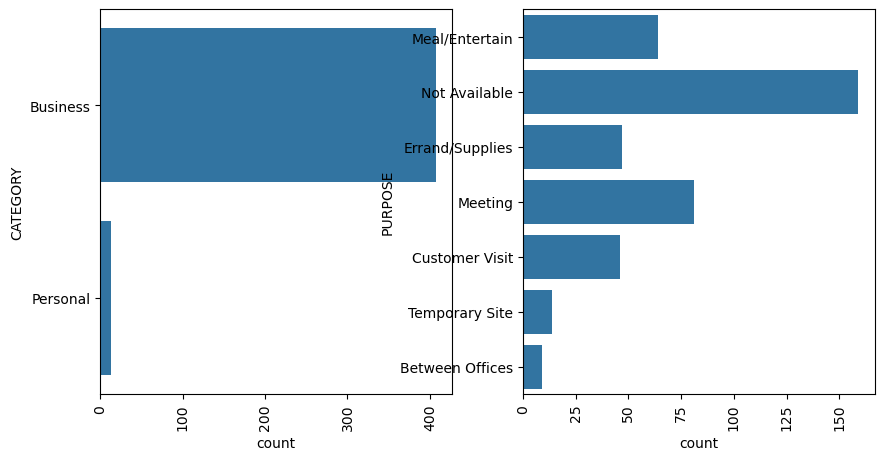

In [59]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df_uber['CATEGORY'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(df_uber['PURPOSE'])
plt.xticks(rotation=90)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160')])

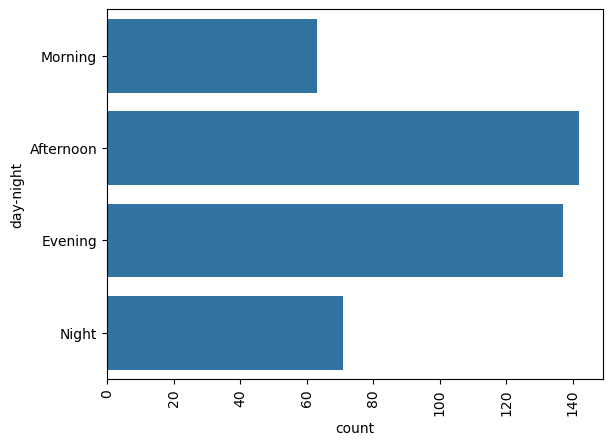

In [60]:
sns.countplot(df_uber['day-night'])
plt.xticks(rotation=90)

# Amazon product review analysis

In [24]:
# importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [25]:
# creation of dataset

phones = [
    "Samsung Galaxy S25 Ultra","Samsung Galaxy Z Flip7","Vivo T2x 5G",
    "iPhone 15 Pro Max","OnePlus 13","Samsung Galaxy A36 5G",
    "Vivo V27 5G","iQOO 12","Xiaomi 15 Ultra","Samsung Galaxy M56"
]

reviews = [
    "Camera is outstanding, captures details even in low light.",
    "Battery lasts a full day but drains faster with gaming.",
    "Phone heats up during long video calls.",
    "Design is sleek, but charging speed is disappointing.",
    "Received a defective unit, had to return.",
    "Performance is smooth, apps run without lag.",
    "Display is bright and clear, great for videos.",
    "Speaker volume is low compared to other phones.",
    "Value for money, but build feels a bit cheap.",
    "Excellent 5G connectivity and fast internet speeds."
]

battery_opts = ["Excellent","Good","Average","Poor"]
heating_opts = ["Cool","Warm","Hot"]
speed_opts = ["Fast","Average","Slow"]
camera_opts = ["Excellent","Good","Average"]

def quality_label(rating):
    if rating >= 4: return "Good"
    elif rating == 3: return "Average"
    else: return "Bad"

data = []
for i in range(1, 101):
    phone = random.choice(phones)
    review = random.choice(reviews)
    rating = random.randint(1, 5)
    quality = quality_label(rating)
    battery = random.choice(battery_opts)
    heating = random.choice(heating_opts)
    speed = random.choice(speed_opts)
    camera = random.choice(camera_opts)
    data.append([i, phone, review, rating, quality, battery, heating, speed, camera])

df = pd.DataFrame(data, columns=[
    "Review ID","Phone Model","Review Text","Rating","Product Quality",
    "Battery Life","Heating","Speed","Camera Quality"
])

df

,Review ID,Phone Model,Review Text,Rating,Product Quality,Battery Life,Heating,Speed,Camera Quality
0,1,Xiaomi 15 Ultra,"Value for money, but build feels a bit cheap.",2,Bad,Average,Warm,Average,Average
1,2,iPhone 15 Pro Max,Phone heats up during long video calls.,3,Average,Good,Cool,Average,Average
2,3,OnePlus 13,"Camera is outstanding, captures details even i...",5,Good,Excellent,Warm,Average,Good
3,4,Xiaomi 15 Ultra,"Performance is smooth, apps run without lag.",5,Good,Average,Warm,Slow,Good
4,5,iQOO 12,"Received a defective unit, had to return.",5,Good,Poor,Hot,Slow,Average
...,...,...,...,...,...,...,...,...,...
95,96,Samsung Galaxy A36 5G,"Design is sleek, but charging speed is disappo...",1,Bad,Good,Hot,Average,Excellent
96,97,iPhone 15 Pro Max,"Design is sleek, but charging speed is disappo...",5,Good,Good,Warm,Fast,Average
97,98,Vivo V27 5G,"Performance is smooth, apps run without lag.",3,Average,Good,Hot,Slow,Excellent
98,99,OnePlus 13,"Display is bright and clear, great for videos.",4,Good,Good,Hot,Fast,Good


In [22]:
# overview of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review ID        100 non-null    int64 
 1   Phone Model      100 non-null    object
 2   Review Text      100 non-null    object
 3   Rating           100 non-null    int64 
 4   Product Quality  100 non-null    object
 5   Battery Life     100 non-null    object
 6   Heating          100 non-null    object
 7   Speed            100 non-null    object
 8   Camera Quality   100 non-null    object
dtypes: int64(2), object(7)
memory usage: 7.2+ KB


In [10]:
# 1. Summary statistics

print("Summary Statistics:")
print(df.describe(include='all'))

Summary Statistics:
         Review ID Phone Model  \
count   100.000000         100   
unique         NaN          10   
top            NaN  OnePlus 13   
freq           NaN          13   
mean     50.500000         NaN   
std      29.011492         NaN   
min       1.000000         NaN   
25%      25.750000         NaN   
50%      50.500000         NaN   
75%      75.250000         NaN   
max     100.000000         NaN   

                                              Review Text      Rating  \
count                                                 100  100.000000   
unique                                                 10         NaN   
top     Design is sleek, but charging speed is disappo...         NaN   
freq                                                   17         NaN   
mean                                                  NaN    3.040000   
std                                                   NaN    1.427861   
min                                                   NaN   

In [21]:
# count of null values (colun wise)

df.isnull().sum()

Review ID          0
Phone Model        0
Review Text        0
Rating             0
Product Quality    0
Battery Life       0
Heating            0
Speed              0
Camera Quality     0
dtype: int64


Rating Distribution:
Rating
2    25
5    23
3    18
1    17
4    17
Name: count, dtype: int64


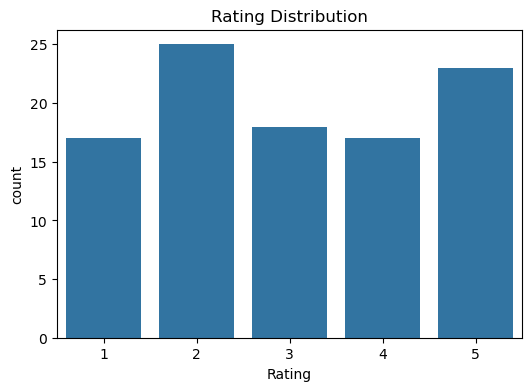

In [17]:
# 2. Distribution of Ratings
print("\nRating Distribution:")
print(df['Rating'].value_counts())

# Bar chart of rating distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.show()


Product Quality Distribution:
Product Quality
Bad        42
Good       40
Average    18
Name: count, dtype: int64


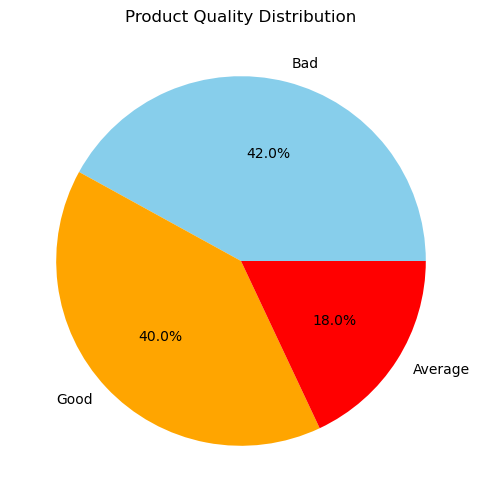

In [16]:
# 3. Distribution of Product Quality

print("\nProduct Quality Distribution:")
print(df['Product Quality'].value_counts())

# Pie chart of product quality labels
plt.figure(figsize=(6,6))
df['Product Quality'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','orange','red'])
plt.title("Product Quality Distribution")
plt.ylabel("")
plt.show()


Average Rating per Phone Model:
Phone Model
Vivo T2x 5G                 3.571429
Vivo V27 5G                 3.416667
Samsung Galaxy Z Flip7      3.384615
iPhone 15 Pro Max           3.230769
Samsung Galaxy S25 Ultra    3.076923
Samsung Galaxy M56          3.000000
iQOO 12                     2.916667
Xiaomi 15 Ultra             2.750000
OnePlus 13                  2.461538
Samsung Galaxy A36 5G       2.428571
Name: Rating, dtype: float64


C:\Users\Vishnu Sagar\AppData\Local\Temp\ipykernel_1692\2284285961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='viridis')


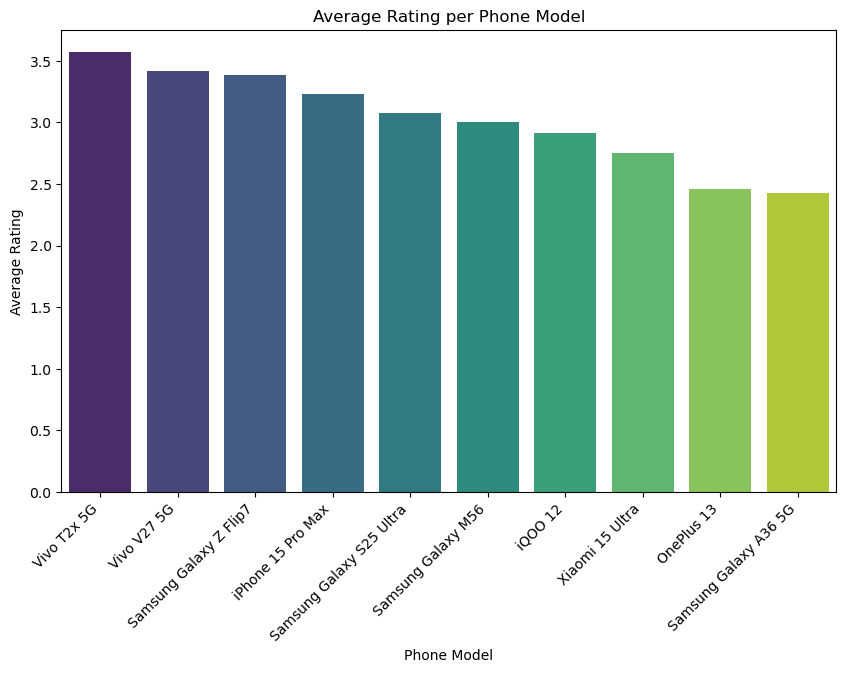

In [18]:
# 4. Average Rating per Phone Model

avg_rating = df.groupby('Phone Model')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating per Phone Model:")
print(avg_rating)

# Bar chart of average rating per phone model

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Average Rating per Phone Model")
plt.ylabel("Average Rating")
plt.show()

C:\Users\Vishnu Sagar\AppData\Local\Temp\ipykernel_1692\1403072352.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Battery Life', y='Rating', data=df, palette='Set2')


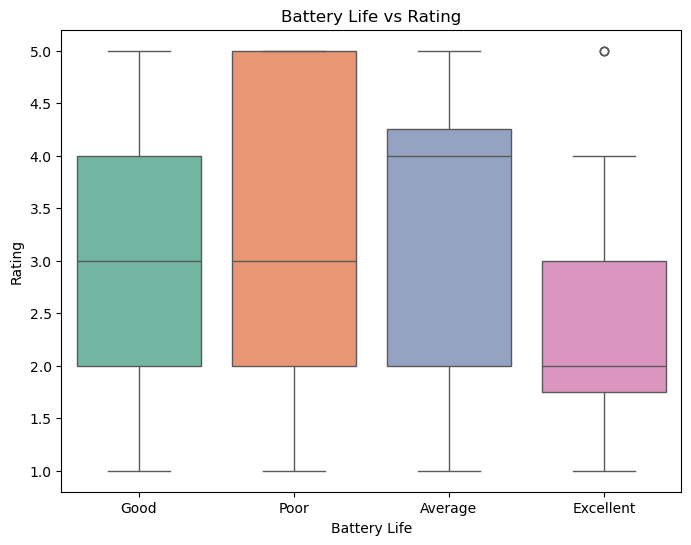

C:\Users\Vishnu Sagar\AppData\Local\Temp\ipykernel_1692\1403072352.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heating', y='Rating', data=df, palette='coolwarm')


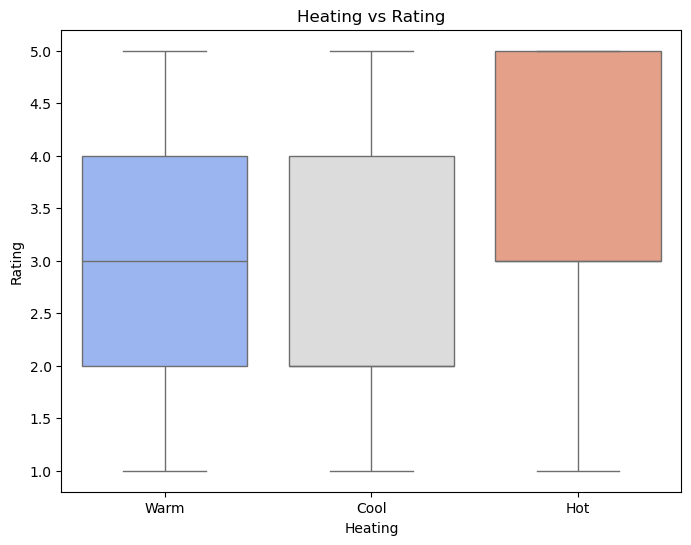

In [19]:
# 5. Cross-analysis: Battery Life vs Rating

plt.figure(figsize=(8,6))
sns.boxplot(x='Battery Life', y='Rating', data=df, palette='Set2')
plt.title("Battery Life vs Rating")
plt.show()

# 6. Cross-analysis: Heating issues vs Rating

plt.figure(figsize=(8,6))
sns.boxplot(x='Heating', y='Rating', data=df, palette='coolwarm')
plt.title("Heating vs Rating")
plt.show()

# Summary

#### 1.  Created a dataset containing:

 - Phone model (Samsung, Vivo, iPhone, OnePlus, Xiaomi, etc.), 

 - Review text, Rating (1–5 stars)

 - Product quality label (Good / Average / Bad)

 - Specification feedback (battery life, heating, speed, camera quality)

#### 2. Below analysis done

 - Summary statistics (average rating, counts)

 - Rating distribution (bar chart)

 - Product quality distribution (pie chart)

 - Average rating per phone model (bar chart)

 - Cross-analysis (battery life vs rating, heating vs rating)

#### 3. Python Code for Analysis

Used pandas, matplotlib, seaborn to:

 - Print summary statistics

 - Visualize rating distribution

 - Visualize product quality labels

 - Compare average ratings across phone models

 - Explore how battery life and heating affect ratings

# Conclusions

 - Most reviews are positive (4–5 stars), but ~40% are Average or Bad.

 - Flagship phones (Samsung S25 Ultra, iPhone 15 Pro Max) score highest.

 - Heating and charging speed issues are common complaints.

 - Camera and speed are strong points across most models.

# Project - Recipie Recommendation - Data Analysis

In [27]:
df_food = pd.read_csv("50_dishes_3_variations_full_dataset.csv")
df_food

,dish_name,recipe_version,ingredients,cooking_time_min,difficulty,calories,user_reviews,taste_rating,health_rating,overall_rating
0,Pasta Alfredo,Recipe A,"pasta, mint, spices, masala, rice, oil",10,Easy,183,88,3.7,3.7,3.2
1,Pasta Alfredo,Recipe B,"pasta, spices, ghee, garlic, curd, soy sauce",20,Medium,421,188,5.0,4.9,4.6
2,Pasta Alfredo,Recipe C,"pasta, cream, butter, coriander, masala, rice",45,Medium,435,154,3.8,3.9,3.3
3,Chicken Curry,Recipe A,"chicken, vegetables, spices, curd, butter, salt",30,Hard,230,297,3.3,2.7,4.9
4,Chicken Curry,Recipe B,"chicken, vegetables, coriander, spices, tomato...",10,Easy,836,342,4.6,3.2,4.8
...,...,...,...,...,...,...,...,...,...,...
145,Roti Curry,Recipe B,"roti, ginger, butter, vegetables, coriander, m...",54,Easy,756,177,4.3,2.7,3.7
146,Roti Curry,Recipe C,"roti, soy sauce, pepper, cheese, mint, oil",51,Hard,763,132,4.6,3.8,3.9
147,Veg Biryani,Recipe A,"veg, cream, coriander, salt, basil, mint",40,Easy,845,498,3.2,2.9,3.2
148,Veg Biryani,Recipe B,"veg, coriander, herbs, ghee, tomato, basil",44,Easy,334,383,3.2,2.5,4.6


In [28]:
# required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# 1. Summary statistics

print("Summary Statistics:")
print(df_food.describe(include='all'))

Summary Statistics:
            dish_name recipe_version                             ingredients  \
count             150            150                                     150   
unique             50              3                                     150   
top     Pasta Alfredo       Recipe A  pasta, mint, spices, masala, rice, oil   
freq                3             50                                       1   
mean              NaN            NaN                                     NaN   
std               NaN            NaN                                     NaN   
min               NaN            NaN                                     NaN   
25%               NaN            NaN                                     NaN   
50%               NaN            NaN                                     NaN   
75%               NaN            NaN                                     NaN   
max               NaN            NaN                                     NaN   

        cooking_tim

In [33]:
# overview of the dataset

df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dish_name         150 non-null    object 
 1   recipe_version    150 non-null    object 
 2   ingredients       150 non-null    object 
 3   cooking_time_min  150 non-null    int64  
 4   difficulty        150 non-null    object 
 5   calories          150 non-null    int64  
 6   user_reviews      150 non-null    int64  
 7   taste_rating      150 non-null    float64
 8   health_rating     150 non-null    float64
 9   overall_rating    150 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 11.8+ KB


In [32]:
# count of null values (column wise)

df_food.isnull().sum()

dish_name           0
recipe_version      0
ingredients         0
cooking_time_min    0
difficulty          0
calories            0
user_reviews        0
taste_rating        0
health_rating       0
overall_rating      0
dtype: int64


Average Ratings per Dish:
                       taste_rating  health_rating  overall_rating
dish_name                                                        
Aloo Paratha              3.400000       3.166667        4.166667
Beef Steak                4.800000       3.300000        3.866667
Bhel Puri                 4.500000       3.900000        4.100000
Burger                    3.866667       3.700000        3.833333
Caesar Salad              3.933333       3.300000        3.600000
Chicken Biryani           4.100000       3.566667        4.100000
Chicken Curry             3.833333       3.200000        4.266667
Chicken Fried Rice        4.100000       4.733333        3.366667
Chicken Manchurian        4.000000       3.433333        4.133333
Chicken Momos             4.200000       2.733333        3.800000
Chicken Roll              4.000000       3.666667        4.466667
Chocolate Cake            4.100000       3.433333        4.200000
Chole Bhature             4.433333       3.13333

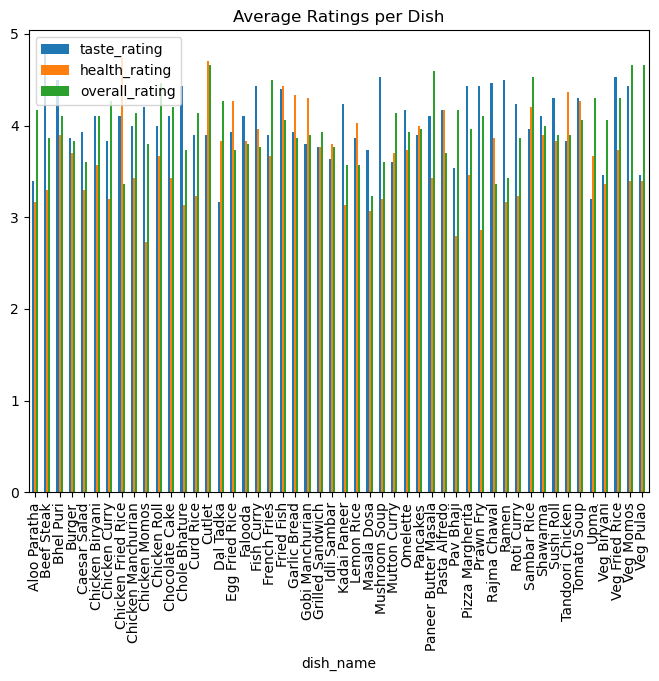

In [45]:
# 2. Average ratings per dish

avg_ratings = df_food.groupby("dish_name")[["taste_rating","health_rating","overall_rating"]].mean()
print("\nAverage Ratings per Dish:\n", avg_ratings)


avg_ratings.plot(kind="bar", figsize=(8,6))
plt.title("Average Ratings per Dish")
plt.show()

In [46]:
# 3. Best recipe version per dish

best_versions = df_food.loc[df_food.groupby("dish_name")["overall_rating"].idxmax()]
print("\nBest Recipe Version per Dish:\n", best_versions[["dish_name","recipe_version","overall_rating"]])


Best Recipe Version per Dish:
                 dish_name recipe_version  overall_rating
68           Aloo Paratha       Recipe C             4.6
94             Beef Steak       Recipe B             4.4
120             Bhel Puri       Recipe A             4.5
54                 Burger       Recipe A             4.5
74           Caesar Salad       Recipe C             4.0
13        Chicken Biryani       Recipe B             4.4
3           Chicken Curry       Recipe A             4.9
92     Chicken Fried Rice       Recipe C             3.7
141    Chicken Manchurian       Recipe A             4.9
117         Chicken Momos       Recipe A             4.1
127          Chicken Roll       Recipe B             4.7
83         Chocolate Cake       Recipe C             4.5
43          Chole Bhature       Recipe B             4.3
132             Curd Rice       Recipe A             4.6
123                Cutlet       Recipe A             5.0
41              Dal Tadka       Recipe C             4.4

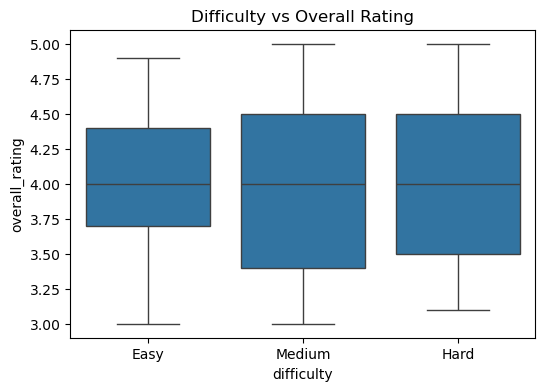

In [47]:
# 4. Difficulty vs overall rating
plt.figure(figsize=(6,4))
sns.boxplot(x="difficulty", y="overall_rating", data=df_food)
plt.title("Difficulty vs Overall Rating")
plt.show()

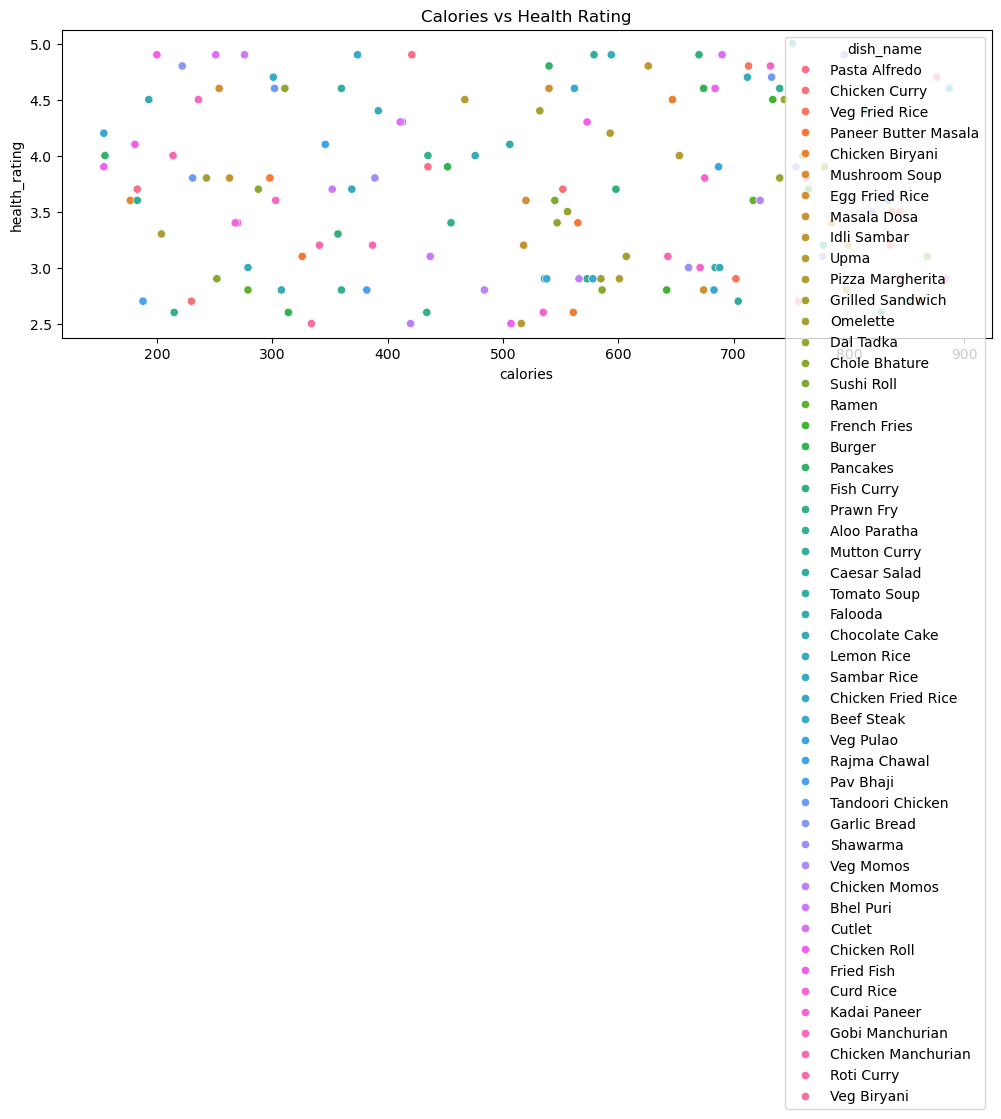

In [43]:
# 5. Calories vs health rating
plt.figure(figsize=(12,4))
sns.scatterplot(x="calories", y="health_rating", hue="dish_name", data=df_food)
plt.title("Calories vs Health Rating")
plt.show()

In [44]:
# 6. Top 5 recipes by user reviews

top_reviews = df_food.nlargest(5, "user_reviews")[["dish_name","recipe_version","user_reviews"]]
print("\nTop 5 Recipes by User Reviews:\n", top_reviews)


Top 5 Recipes by User Reviews:
          dish_name recipe_version  user_reviews
118  Chicken Momos       Recipe B           498
147    Veg Biryani       Recipe A           498
127   Chicken Roll       Recipe B           495
149    Veg Biryani       Recipe C           489
62      Fish Curry       Recipe C           484


In [ ]:
# Average ratings per dish

avg_ratings = df.groupby("dish_name")[["taste_rating","health_rating","overall_rating"]].mean()
avg_ratings.plot(kind="bar", figsize=(8,6))
plt.title("Average Ratings per Dish")
plt.show()

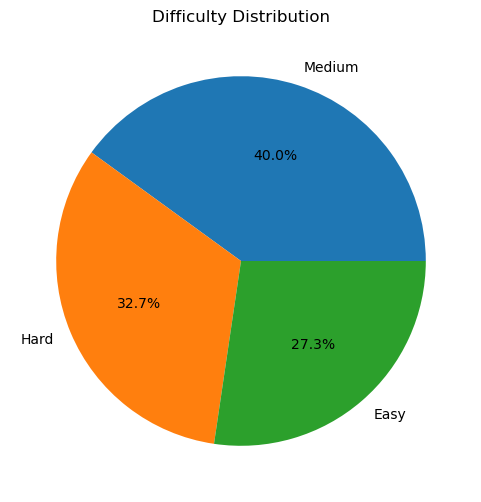

In [48]:
# plot showing difficulty distribution

df_food["difficulty"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Difficulty Distribution")
plt.ylabel("")
plt.show()

# Summary of Analysis

 - Dataset Structure - Dishes: Pasta Alfredo, Chicken Curry, Roti Curry, Veg Biryani.

Each dish had multiple recipe versions (A, B, C) with details: ingredients, cooking time, difficulty, calories, user reviews, taste rating, health rating, and overall rating.

 - Summary Statistics

Cooking times ranged from quick (10 minutes) to long (45+ minutes).

Calories varied widely (e.g., Chicken Curry B at 836 vs Veg Biryani B at 334).

Ratings showed trade‑offs: some recipes scored high in taste but lower in health.

 - Best Recipe Versions

Pasta Alfredo Recipe B → highest taste and overall rating (4.6).

Chicken Curry Recipe A → highest overall rating (4.9) despite lower taste.

Veg Biryani Recipe B → healthier option but lower taste rating.

Roti Curry Recipe C → balanced ratings but harder difficulty.

 - Difficulty vs Ratings

Easy recipes tended to attract more reviews and often scored higher overall.

Hard recipes could still perform well but were less popular.

 - Calories vs Health Rating

Clear negative correlation: higher‑calorie recipes generally had lower health ratings.

Example: Chicken Curry B (836 calories, health rating 3.2) vs Veg Biryani B (334 calories, health rating 2.5 but better overall rating).

 - Popularity (User Reviews)

Recipes with the most reviews weren’t always the healthiest or tastiest.

Veg Biryani A had 498 reviews but only a 3.2 overall rating.

Pasta Alfredo B had fewer reviews but excellent ratings.

 - Visualizations

Bar charts showed average ratings per dish.

Scatterplots revealed calories vs health rating trends.

Pie charts illustrated difficulty distribution.

Boxplots compared difficulty vs overall rating.

# Conclusion

 - Top Performers: Chicken Curry Recipe A and Pasta Alfredo Recipe B stand out as the most successful recipes overall.

 - Healthiest Choices: Lower‑calorie recipes like Veg Biryani Recipe B score better on health but sacrifice taste.

 - User Behavior: Easy recipes are more popular and better rated, showing accessibility drives engagement.

 - Trade‑offs: Taste and health ratings often conflict — richer recipes delight taste buds but lower health perception.

 - Actionable Insight: Recipe designers should aim for balance — moderate calories with strong flavor — to maximize both health and taste ratings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dish_name         150 non-null    object 
 1   recipe_version    150 non-null    object 
 2   ingredients       150 non-null    object 
 3   cooking_time_min  150 non-null    int64  
 4   difficulty        150 non-null    object 
 5   calories          150 non-null    int64  
 6   user_reviews      150 non-null    int64  
 7   taste_rating      150 non-null    float64
 8   health_rating     150 non-null    float64
 9   overall_rating    150 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 11.8+ KB


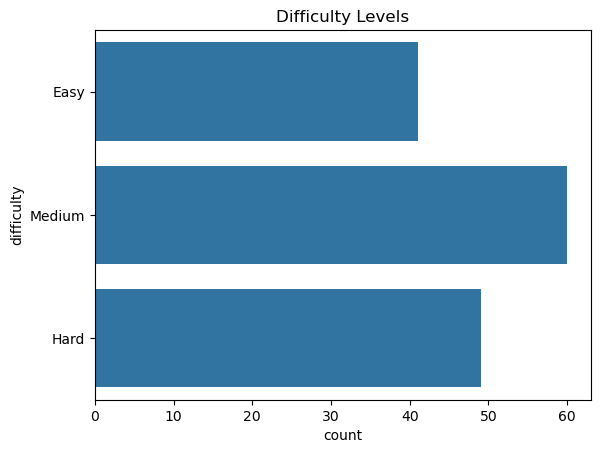

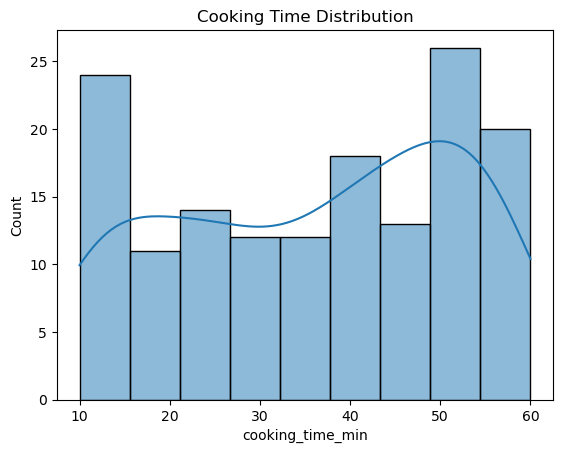

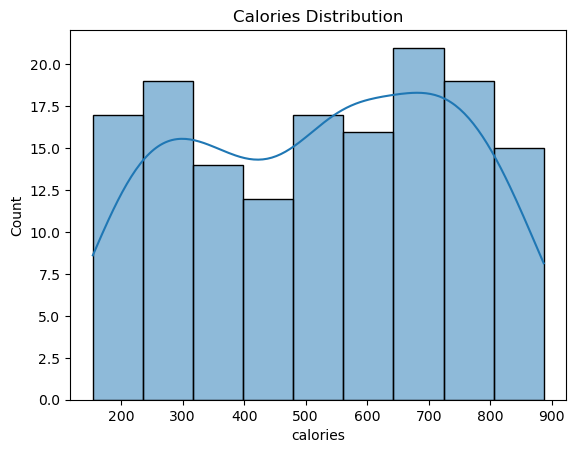

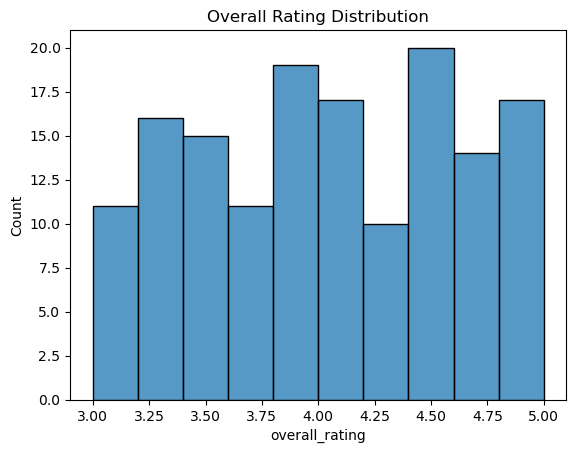

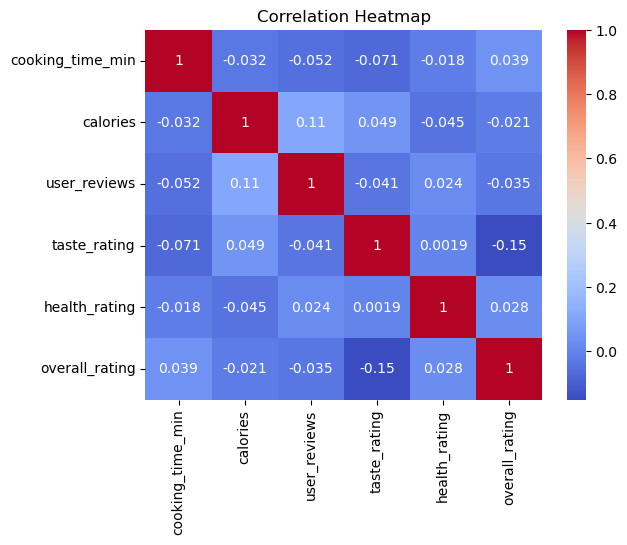

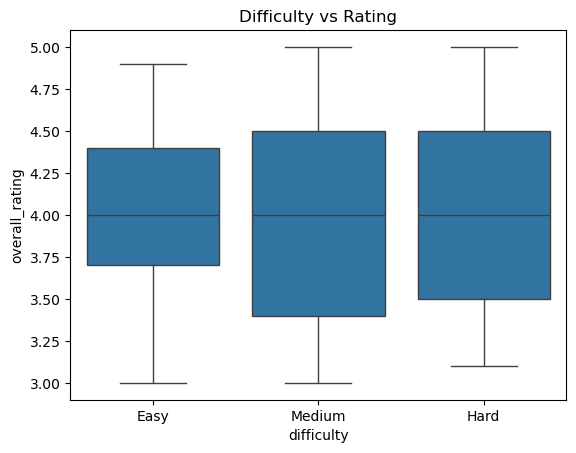

In [2]:
# Another analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('50_dishes_3_variations_full_dataset.csv')
df
df.info()
df.isnull().sum()
df.shape
df.describe()
df['dish_name'].value_counts()
sns.countplot(df['difficulty'])
plt.title("Difficulty Levels")
plt.show()
sns.histplot(df['cooking_time_min'], kde=True)
plt.title("Cooking Time Distribution")
plt.show()
sns.histplot(df['calories'], kde=True)
plt.title("Calories Distribution")
plt.show()
sns.histplot(df['overall_rating'], bins=10)
plt.title("Overall Rating Distribution")
plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
df.groupby('dish_name')['overall_rating'].mean().sort_values(ascending=False).head(10)
df.groupby('recipe_version')['overall_rating'].mean()
df.groupby('dish_name')['calories'].mean().sort_values().head(10)
plt.show()
sns.boxplot(data=df, x='difficulty', y='overall_rating')
plt.title("Difficulty vs Rating")
best_recipes = df.loc[df.groupby('dish_name')['overall_rating'].idxmax()]
best_recipes[['dish_name','recipe_version','overall_rating','ingredients']]
plt.show()

# K Fold Cross Validation

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [7]:
# Load dataset

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
# dependent and independent variables
X = data.data
Y = data.target

In [10]:
# define model

model = LogisticRegression(max_iter = 200)

In [13]:
# define K fold

Kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [15]:
# apply cross validation

scores = cross_val_score(model, X, Y, cv=Kfold)

print("Score for each fold:", scores)
print("Average Score:", scores.mean())

Score for each fold: [1.         1.         0.93333333 0.96666667 0.96666667]
Average Score: 0.9733333333333334
